In [28]:
#%pip install ipympl
#import ipympl
%matplotlib ipympl
import dtw_flex.core as core
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import Generator, PCG64
import pandas as pd

In [29]:
nref = 3
nquery = 10 #represents window size
dtw_obj = core.Dtw(nref_raw=nref, nquery=nquery)

#generate random data and add some data spikes
rng = Generator(PCG64(seed=175))
n_data = 1000
data = np.cumsum(rng.random(n_data)-0.5)
p1_id = rng.integers(0,n_data//2,size=5)
data[p1_id] = data[p1_id] + 1.5
p2_id = rng.integers(n_data//2,n_data-2,size=5)
p2_id = np.concatenate([p2_id, p2_id + 1])
data[p2_id] = data[p2_id] + 1.5
p_id = np.concatenate([p1_id,p2_id])

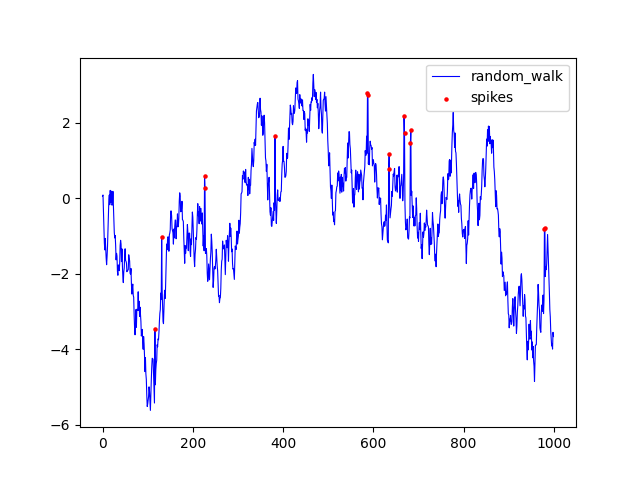

In [30]:
fig, ax = plt.subplots(1)
ax.plot(data, lw=0.8, color='blue', zorder=0, label = 'random_walk')
ax.scatter(p_id,data[p_id], s=5, facecolors='red', zorder=1, label='spikes')
ax.legend()

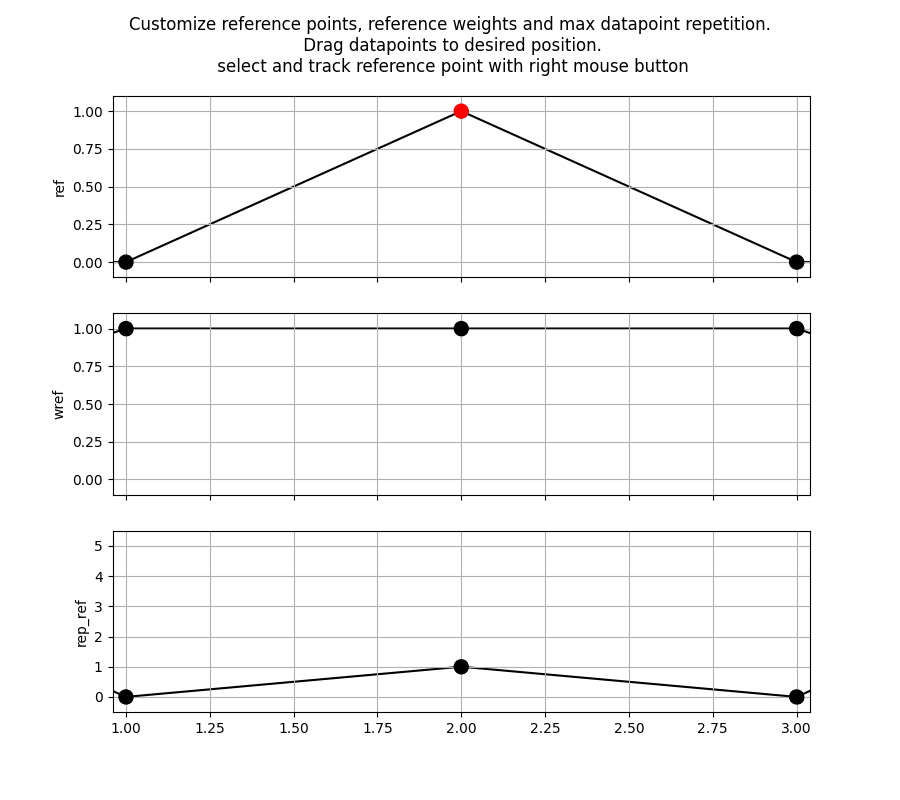

In [31]:
dtw_obj.flag = np.array([dtw_obj.nref // 2])
dtw_obj.ref[dtw_obj.nref // 2] = 1
dtw_obj.rep_ref[dtw_obj.nref // 2] = 1
dtw_obj.ref_plotset(hide_endpoints=True)

In [32]:
dtw_obj.lim_err = 0.75 
dtw_obj.lim_amp = 0.75
df = dtw_obj.roll(data)

In [33]:
p_id_dtw = df.dropna(subset=['group']).index

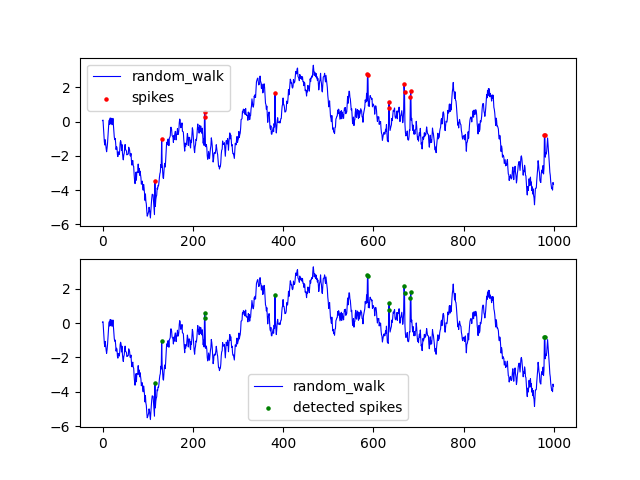

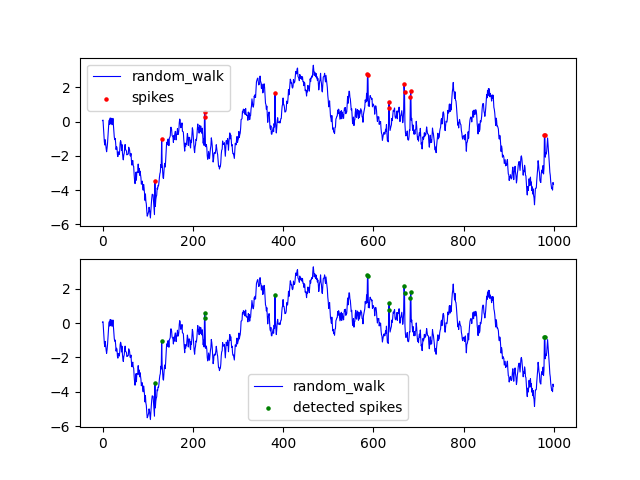

In [34]:
fig, ax = plt.subplots(2)
ax[0].plot(data, lw=0.8, color='blue', zorder=0, label = 'random_walk')
ax[0].scatter(p_id,data[p_id], s=5, facecolors='red', zorder=1, label='spikes')
ax[0].legend()

ax[1].plot(data, lw=0.8, color='blue', zorder=0, label = 'random_walk')
ax[1].scatter(p_id_dtw,data[p_id_dtw],s=5,facecolors='green', label='detected spikes')
ax[1].legend()
fig.show()